数据基本信息：
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 242369 entries, 0 to 242368
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   fid       242369 non-null  float64 
 1   DN        242369 non-null  int64   
 2   geometry  242369 non-null  geometry
dtypes: float64(1), geometry(1), int64(1)
memory usage: 5.5 MB
None

列名：
['fid', 'DN', 'geometry']

数据预览：
   fid  DN                                           geometry
0  1.0   6  POLYGON Z ((868494.068 3364272.096 0, 868494.0...
1  2.0   3  POLYGON Z ((870494.068 3363472.096 0, 870494.0...
2  3.0   6  POLYGON Z ((870594.068 3363472.096 0, 870594.0...
3  4.0   5  POLYGON Z ((870494.068 3363372.096 0, 870494.0...
4  5.0   8  POLYGON Z ((870594.068 3363372.096 0, 870594.0...

统计结果已保存至：F:\ScientificDatabase\paper02_use\population_stats.xlsx


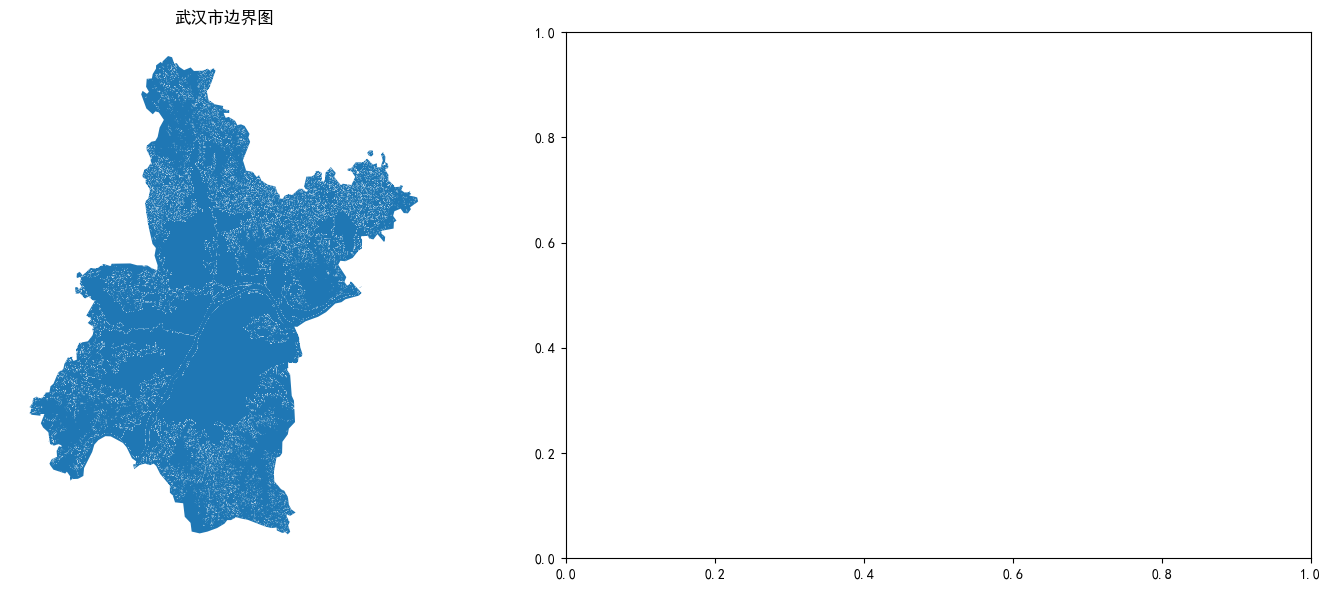

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
shp_path = r"F:\ScientificDatabase\paper02_use\wuhan_renkou_data_shp.shp"
gdf = gpd.read_file(shp_path, encoding='utf-8')

# 显示基本信息
print("数据基本信息：")
print(gdf.info())
print("\n列名：")
print(gdf.columns.tolist())
print("\n数据预览：")
print(gdf.head())

# 绘制基础地图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 左图：基础边界图
gdf.plot(ax=ax1)
ax1.set_title('武汉市边界图')
ax1.axis('off')

# 如果数据中包含人口字段（假设字段名为'population'），绘制人口分布图
if 'population' in gdf.columns:
    gdf.plot(column='population', 
             ax=ax2,
             legend=True,
             cmap='YlOrRd',
             legend_kwds={'label': '人口数量'})
    ax2.set_title('人口分布热力图')
    ax2.axis('off')

plt.tight_layout()

# 保存基础统计信息
output_path = r"F:\ScientificDatabase\paper02_use\population_stats.xlsx"
with pd.ExcelWriter(output_path) as writer:
    # 基本统计量
    gdf.describe().to_excel(writer, sheet_name='基本统计')
    
    # 如果有人口数据，添加人口分析
    if 'population' in gdf.columns:
        pop_stats = pd.DataFrame({
            '统计指标': ['总人口', '平均人口', '最大人口', '最小人口'],
            '数值': [
                gdf['population'].sum(),
                gdf['population'].mean(),
                gdf['population'].max(),
                gdf['population'].min()
            ]
        })
        pop_stats.to_excel(writer, sheet_name='人口统计')

print(f"\n统计结果已保存至：{output_path}")

数据集基本信息：
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 242369 entries, 0 to 242368
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   fid       242369 non-null  float64 
 1   DN        242369 non-null  int64   
 2   geometry  242369 non-null  geometry
dtypes: float64(1), geometry(1), int64(1)
memory usage: 5.5 MB
None

属性列名：
['fid', 'DN', 'geometry']

DN列（人口数据）统计信息：
count    242369.000000
mean         48.703584
std          97.638808
min           0.000000
25%           5.000000
50%          10.000000
75%          29.000000
max         790.000000
Name: DN, dtype: float64


C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  ax.figure.canvas.draw_idle()
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


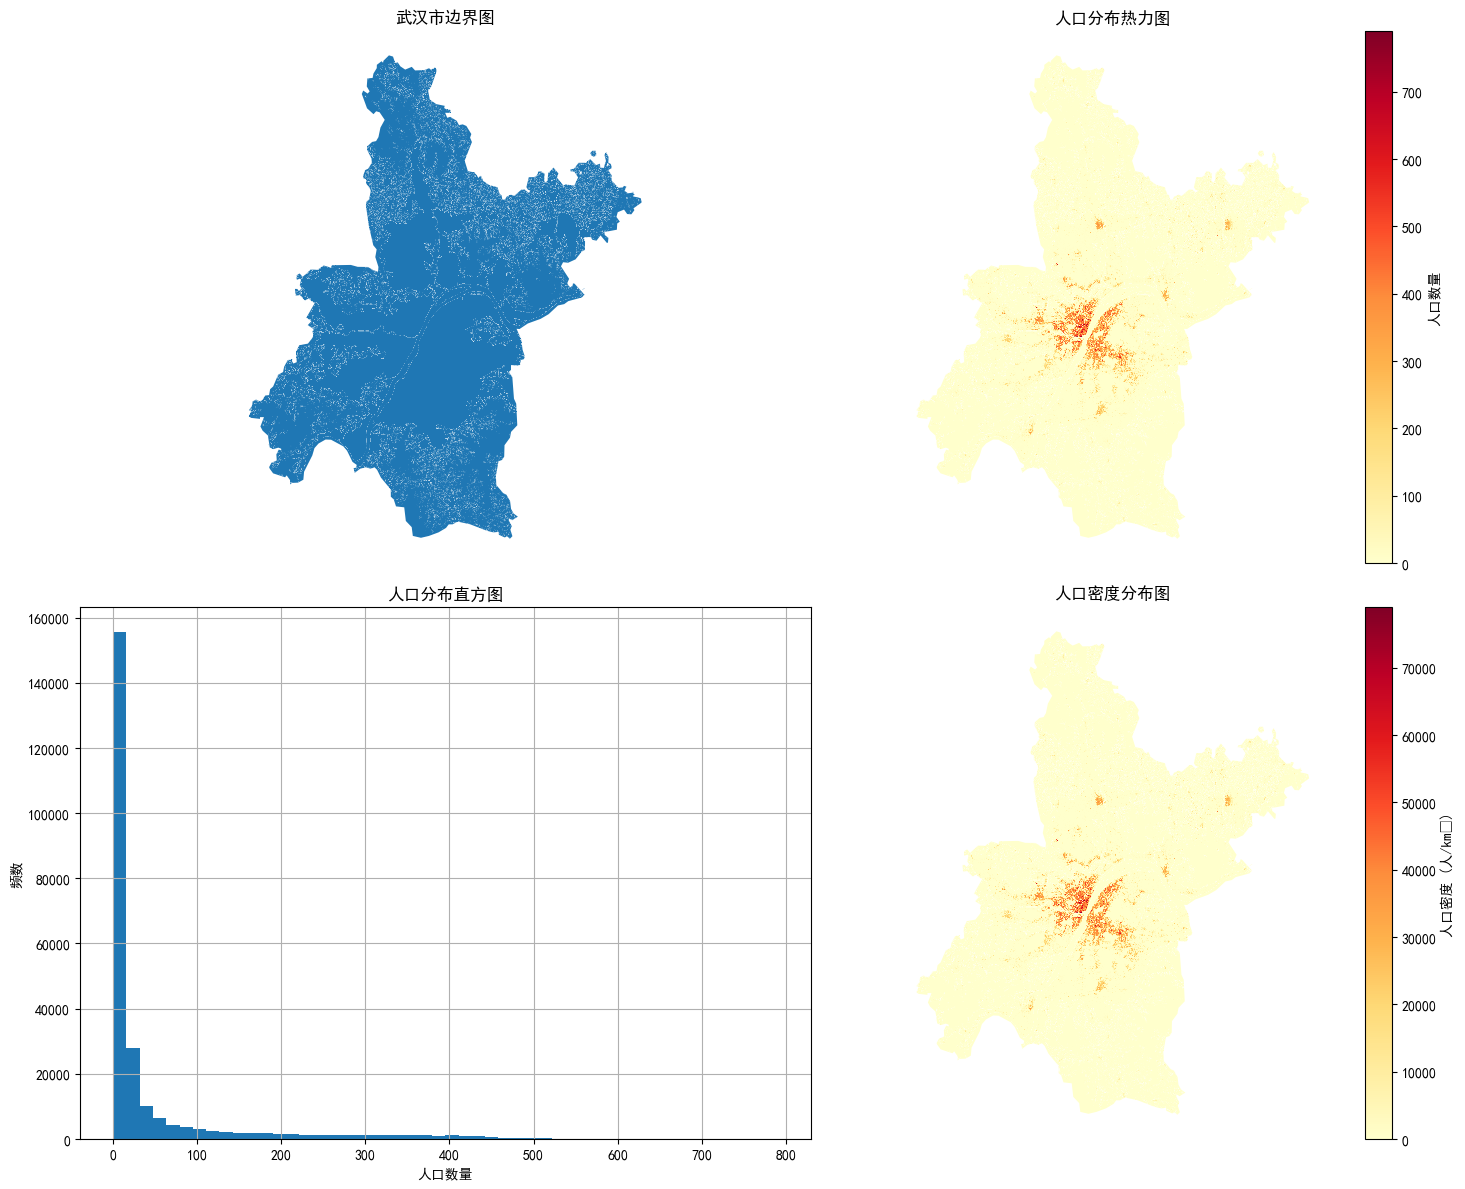


统计结果已保存至：F:\ScientificDatabase\paper02_use\population_analysis.xlsx

关键统计信息：
总人口：11,804,239
平均网格人口：48
最大网格人口：790
网格总数：242,369
平均人口密度：4,805 人/km²


In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取人口数据
shp_path = r"F:\ScientificDatabase\paper02_use\wuhan_renkou_data_shp.shp"
gdf = gpd.read_file(shp_path, encoding='utf-8')

# 显示数据基本信息
print("数据集基本信息：")
print("=" * 50)
print(gdf.info())
print("\n属性列名：")
print(gdf.columns.tolist())

# 显示DN列（人口数据）的基本统计信息
print("\nDN列（人口数据）统计信息：")
print("=" * 50)
print(gdf['DN'].describe())

# 创建人口分布可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. 基础边界图
gdf.plot(ax=ax1)
ax1.set_title('武汉市边界图')
ax1.axis('off')

# 2. 人口分布热力图
gdf.plot(column='DN', 
         ax=ax2,
         legend=True,
         cmap='YlOrRd',
         legend_kwds={'label': '人口数量'})
ax2.set_title('人口分布热力图')
ax2.axis('off')

# 3. 人口直方图
gdf['DN'].hist(ax=ax3, bins=50)
ax3.set_title('人口分布直方图')
ax3.set_xlabel('人口数量')
ax3.set_ylabel('频数')
ax3.grid(True)

# 4. 人口密度图（考虑面积）
gdf['area_km2'] = gdf.geometry.area / 1_000_000  # 转换为平方公里
gdf['population_density'] = gdf['DN'] / gdf['area_km2']
gdf.plot(column='population_density',
         ax=ax4,
         legend=True,
         cmap='YlOrRd',
         legend_kwds={'label': '人口密度 (人/km²)'})
ax4.set_title('人口密度分布图')
ax4.axis('off')

plt.tight_layout()
plt.show()

# 保存统计结果
output_path = r"F:\ScientificDatabase\paper02_use\population_analysis.xlsx"
with pd.ExcelWriter(output_path) as writer:
    # 基本统计信息
    stats_df = pd.DataFrame({
        '统计指标': ['总人口', '平均人口', '最大人口', '最小人口', '标准差', '网格数量'],
        '数值': [
            gdf['DN'].sum(),
            gdf['DN'].mean(),
            gdf['DN'].max(),
            gdf['DN'].min(),
            gdf['DN'].std(),
            len(gdf)
        ]
    })
    stats_df.to_excel(writer, sheet_name='基本统计', index=False)
    
    # 分位数统计
    quantiles_df = pd.DataFrame({
        '分位数': ['25%', '50%', '75%', '90%', '95%', '99%'],
        '人口数量': [
            gdf['DN'].quantile(0.25),
            gdf['DN'].quantile(0.50),
            gdf['DN'].quantile(0.75),
            gdf['DN'].quantile(0.90),
            gdf['DN'].quantile(0.95),
            gdf['DN'].quantile(0.99)
        ]
    })
    quantiles_df.to_excel(writer, sheet_name='分位数统计', index=False)
    
    # 人口密度统计
    density_stats = gdf[['DN', 'area_km2', 'population_density']].describe()
    density_stats.to_excel(writer, sheet_name='密度统计')

print(f"\n统计结果已保存至：{output_path}")

# 打印关键统计信息
print("\n关键统计信息：")
print("=" * 50)
print(f"总人口：{format(int(gdf['DN'].sum()), ',')}")
print(f"平均网格人口：{format(int(gdf['DN'].mean()), ',')}")
print(f"最大网格人口：{format(int(gdf['DN'].max()), ',')}")
print(f"网格总数：{format(len(gdf), ',')}")
print(f"平均人口密度：{format(int(gdf['population_density'].mean()), ',')} 人/km²")

让我帮您读取和分析武汉人口数据的shapefile文件。



In [9]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # 设置中文显示
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

# # 读取人口数据
# shp_path = r"F:\ScientificDatabase\paper02_use\wuhan_renkou_data_shp.shp"
# gdf = gpd.read_file(shp_path, encoding='utf-8')

# # 显示数据基本信息
# print("数据集基本信息：")
# print("=" * 50)
# print(gdf.info())
# print("\n属性列名：")
# print(gdf.columns.tolist())

# # 显示DN列（人口数据）的基本统计信息
# print("\nDN列（人口数据）统计信息：")
# print("=" * 50)
# print(gdf['DN'].describe())

# # 创建人口分布可视化
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# # 1. 基础边界图
# gdf.plot(ax=ax1)
# ax1.set_title('武汉市边界图')
# ax1.axis('off')

# # 2. 人口分布热力图
# gdf.plot(column='DN', 
#          ax=ax2,
#          legend=True,
#          cmap='YlOrRd',
#          legend_kwds={'label': '人口数量'})
# ax2.set_title('人口分布热力图')
# ax2.axis('off')

# # 3. 人口直方图
# gdf['DN'].hist(ax=ax3, bins=50)
# ax3.set_title('人口分布直方图')
# ax3.set_xlabel('人口数量')
# ax3.set_ylabel('频数')
# ax3.grid(True)

# # 4. 人口密度图（考虑面积）
# gdf['area_km2'] = gdf.geometry.area / 1_000_000  # 转换为平方公里
# gdf['population_density'] = gdf['DN'] / gdf['area_km2']
# gdf.plot(column='population_density',
#          ax=ax4,
#          legend=True,
#          cmap='YlOrRd',
#          legend_kwds={'label': '人口密度 (人/km²)'})
# ax4.set_title('人口密度分布图')
# ax4.axis('off')

# plt.tight_layout()
# plt.show()

# # 保存统计结果
# output_path = r"F:\ScientificDatabase\paper02_use\population_analysis.xlsx"
# with pd.ExcelWriter(output_path) as writer:
#     # 基本统计信息
#     stats_df = pd.DataFrame({
#         '统计指标': ['总人口', '平均人口', '最大人口', '最小人口', '标准差', '网格数量'],
#         '数值': [
#             gdf['DN'].sum(),
#             gdf['DN'].mean(),
#             gdf['DN'].max(),
#             gdf['DN'].min(),
#             gdf['DN'].std(),
#             len(gdf)
#         ]
#     })
#     stats_df.to_excel(writer, sheet_name='基本统计', index=False)
    
#     # 分位数统计
#     quantiles_df = pd.DataFrame({
#         '分位数': ['25%', '50%', '75%', '90%', '95%', '99%'],
#         '人口数量': [
#             gdf['DN'].quantile(0.25),
#             gdf['DN'].quantile(0.50),
#             gdf['DN'].quantile(0.75),
#             gdf['DN'].quantile(0.90),
#             gdf['DN'].quantile(0.95),
#             gdf['DN'].quantile(0.99)
#         ]
#     })
#     quantiles_df.to_excel(writer, sheet_name='分位数统计', index=False)
    
#     # 人口密度统计
#     density_stats = gdf[['DN', 'area_km2', 'population_density']].describe()
#     density_stats.to_excel(writer, sheet_name='密度统计')

# print(f"\n统计结果已保存至：{output_path}")

# # 打印关键统计信息
# print("\n关键统计信息：")
# print("=" * 50)
# print(f"总人口：{format(int(gdf['DN'].sum()), ',')}")
# print(f"平均网格人口：{format(int(gdf['DN'].mean()), ',')}")
# print(f"最大网格人口：{format(int(gdf['DN'].max()), ',')}")
# print(f"网格总数：{format(len(gdf), ',')}")
# print(f"平均人口密度：{format(int(gdf['population_density'].mean()), ',')} 人/km²")



这段代码主要完成以下工作：

1. **数据读取和基本信息展示**
   - 读取shapefile文件
   - 显示数据结构和属性信息
   - 展示DN列的基本统计信息

2. **可视化分析**
   - 基础边界图
   - 人口分布热力图
   - 人口分布直方图
   - 人口密度分布图

3. **统计分析**
   - 基本统计指标（总人口、平均值等）
   - 分位数统计
   - 人口密度分析

4. **数据导出**
   - 将统计结果保存为Excel文件
   - 包含多个统计维度的sheet

运行这段代码后，您可以获得完整的数据概览和详细的统计分析结果。如果您需要特定的分析维度或其他可视化方式，请告诉我。

数据读取完成
人口数据网格数：242369
街道数据数量：199


C:\Users\asus\AppData\Local\Temp\ipykernel_89940\369593299.py:23: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["Albers_Conic_Equal_Area",GEOGCS["GCS_Krass ...
Right CRS: EPSG:4326

  joined = gpd.sjoin(pop_gdf, district_gdf, how='inner', predicate='intersects')
C:\Users\asus\AppData\Local\Temp\ipykernel_89940\369593299.py:46: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_with_pop['面积(km²)'] = district_with_pop.geometry.area / 1_000_000
C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\asus\AppData\Local\Temp\ipykernel_89940\369593299.py:73: Use

IndexError: index 0 is out of bounds for axis 0 with size 0

c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


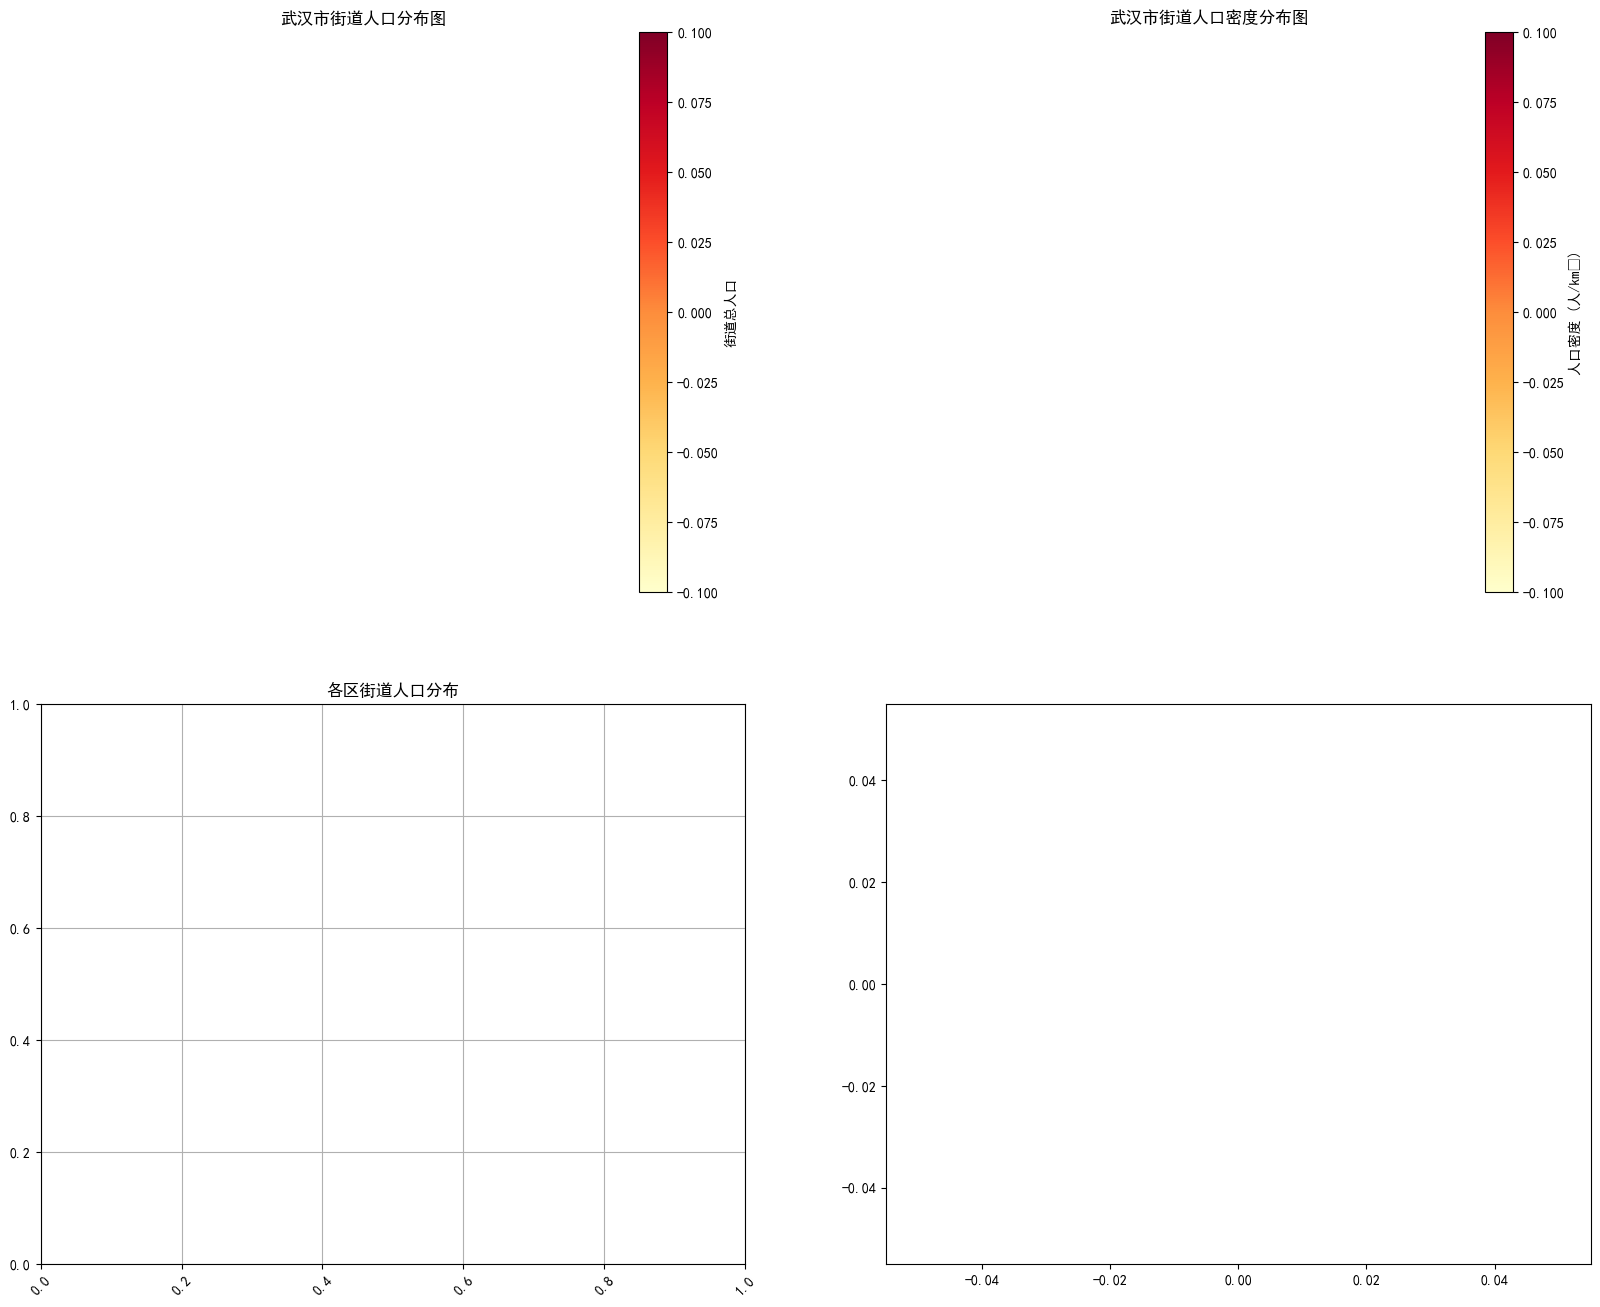

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
pop_path = r"F:\ScientificDatabase\paper02_use\wuhan_renkou_data_shp.shp"
district_path = r"F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Subdistrict_Administrative_Boundaries_edited\Wuhan_district_detail.shp"

# 读取两个数据集
pop_gdf = gpd.read_file(pop_path, encoding='utf-8')
district_gdf = gpd.read_file(district_path, encoding='utf-8')

print("数据读取完成")
print(f"人口数据网格数：{len(pop_gdf)}")
print(f"街道数据数量：{len(district_gdf)}")

# 空间连接分析
joined = gpd.sjoin(pop_gdf, district_gdf, how='inner', predicate='intersects')

# 修改后的街道统计方式
street_stats = pd.DataFrame({
    '总人口': joined.groupby(['Name', 'path'])['DN'].sum(),
    '平均人口密度': joined.groupby(['Name', 'path'])['DN'].mean(),
    '网格数': joined.groupby(['Name', 'path'])['DN'].count()
}).reset_index()

# 提取区名
def extract_district_name(path):
    parts = path.split('/')
    if len(parts) == 1:
        parts = path.split('\\')
    for part in parts:
        if '区' in part:
            return part.split('区')[0] + '区'
    return '未知区域'

street_stats['所属区域'] = street_stats['path'].apply(extract_district_name)

# 计算面积和人口密度
district_with_pop = district_gdf.merge(street_stats[['Name', '总人口']], on='Name', how='left')
district_with_pop['面积(km²)'] = district_with_pop.geometry.area / 1_000_000
district_with_pop['人口密度'] = district_with_pop['总人口'] / district_with_pop['面积(km²)']

# 可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. 街道人口分布图
district_with_pop.plot(column='总人口', 
                      ax=ax1,
                      legend=True,
                      cmap='YlOrRd',
                      legend_kwds={'label': '街道总人口'})
ax1.set_title('武汉市街道人口分布图')
ax1.axis('off')

# 2. 人口密度分布图
district_with_pop.plot(column='人口密度',
                      ax=ax2,
                      legend=True,
                      cmap='YlOrRd',
                      legend_kwds={'label': '人口密度 (人/km²)'})
ax2.set_title('武汉市街道人口密度分布图')
ax2.axis('off')

# 3. 区域人口箱线图
sns.boxplot(data=street_stats, x='所属区域', y='总人口', ax=ax3)
ax3.set_title('各区街道人口分布')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.grid(True)

# 4. 区域总人口柱状图
district_pop = street_stats.groupby('所属区域')['总人口'].sum().sort_values()
district_pop.plot(kind='barh', ax=ax4)
ax4.set_title('武汉市各区总人口')
ax4.set_xlabel('人口数量')
ax4.grid(True)

plt.tight_layout()
plt.show()

# 保存结果
output_path = r"F:\ScientificDatabase\paper02_use\wuhan_population_analysis.xlsx"
with pd.ExcelWriter(output_path) as writer:
    # 街道级统计
    street_stats.to_excel(writer, sheet_name='街道人口统计', index=False)
    
    # 区级统计
    district_summary = street_stats.groupby('所属区域').agg({
        '总人口': 'sum',
        '网格数': 'sum'
    })
    district_summary['街道数量'] = street_stats.groupby('所属区域')['Name'].nunique()
    district_summary.to_excel(writer, sheet_name='区域人口统计')

# 保存地理数据
output_shp = r"F:\ScientificDatabase\paper02_use\wuhan_population_streets.shp"
district_with_pop.to_file(output_shp, encoding='utf-8')

print("\n分析结果已保存：")
print(f"1. Excel文件：{output_path}")
print(f"2. Shapefile：{output_shp}")

# 打印关键统计信息
print("\n关键统计信息：")
print("=" * 50)
print(f"总人口：{format(int(street_stats['总人口'].sum()), ',')}")
print("\n各区人口统计：")
print(district_summary['总人口'].sort_values(ascending=False))

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
pop_path = r"F:\ScientificDatabase\paper02_use\wuhan_renkou_data_shp.shp"
district_path = r"F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Subdistrict_Administrative_Boundaries_edited\Wuhan_district_detail.shp"

# 读取两个数据集
pop_gdf = gpd.read_file(pop_path, encoding='utf-8')
district_gdf = gpd.read_file(district_path, encoding='utf-8')

print("数据读取完成")
print(f"人口数据网格数：{len(pop_gdf)}")
print(f"街道数据数量：{len(district_gdf)}")

# 空间连接分析
joined = gpd.sjoin(pop_gdf, district_gdf, how='inner', predicate='intersects')
print(f"空间连接后的数据量：{len(joined)}")

# 验证连接结果
if len(joined) == 0:
    raise ValueError("空间连接结果为空，请检查数据的空间关系")

# 修改后的街道统计方式
grouped = joined.groupby(['Name', 'path'])
street_stats = pd.DataFrame({
    '总人口': grouped['DN'].sum(),
    '平均人口密度': grouped['DN'].mean(),
    '网格数': grouped['DN'].count()
}).reset_index()

print(f"统计后的街道数量：{len(street_stats)}")

# 提取区名
def extract_district_name(path):
    parts = path.split('/')
    if len(parts) == 1:
        parts = path.split('\\')
    for part in parts:
        if '区' in part:
            return part.split('区')[0] + '区'
    return '未知区域'

street_stats['所属区域'] = street_stats['path'].apply(extract_district_name)

# 验证区域提取结果
print("\n提取的区域列表：")
print(street_stats['所属区域'].unique())

# 计算面积和人口密度
district_with_pop = district_gdf.merge(street_stats[['Name', '总人口']], on='Name', how='left')
district_with_pop['面积(km²)'] = district_with_pop.geometry.area / 1_000_000
district_with_pop['人口密度'] = district_with_pop['总人口'] / district_with_pop['面积(km²)']

# 检查数据是否有效
if district_with_pop['总人口'].isna().all():
    raise ValueError("合并后没有有效的人口数据")

# 创建图表之前验证数据
district_pop = street_stats.groupby('所属区域')['总人口'].sum()
if len(district_pop) == 0:
    raise ValueError("没有有效的区域人口数据")

print("\n各区人口统计：")
print(district_pop.sort_values(ascending=False))

# 创建可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. 街道人口分布图
district_with_pop.plot(column='总人口', 
                      ax=ax1,
                      legend=True,
                      cmap='YlOrRd',
                      legend_kwds={'label': '街道总人口'})
ax1.set_title('武汉市街道人口分布图')
ax1.axis('off')

# 2. 人口密度分布图
district_with_pop.plot(column='人口密度',
                      ax=ax2,
                      legend=True,
                      cmap='YlOrRd',
                      legend_kwds={'label': '人口密度 (人/km²)'})
ax2.set_title('武汉市街道人口密度分布图')
ax2.axis('off')

# 3. 区域人口箱线图
if len(street_stats) > 0:
    sns.boxplot(data=street_stats, x='所属区域', y='总人口', ax=ax3)
    ax3.set_title('各区街道人口分布')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
    ax3.grid(True)

# 4. 区域总人口柱状图
if len(district_pop) > 0:
    district_pop.plot(kind='barh', ax=ax4)
    ax4.set_title('武汉市各区总人口')
    ax4.set_xlabel('人口数量')
    ax4.grid(True)

plt.tight_layout()
plt.show()

# 保存结果
output_path = r"F:\ScientificDatabase\paper02_use\wuhan_population_analysis.xlsx"
with pd.ExcelWriter(output_path) as writer:
    street_stats.to_excel(writer, sheet_name='街道人口统计', index=False)
    district_pop.to_frame('总人口').to_excel(writer, sheet_name='区域人口统计')

print(f"\n分析结果已保存至：{output_path}")

数据读取完成
人口数据网格数：242369
街道数据数量：199
空间连接后的数据量：0


C:\Users\asus\AppData\Local\Temp\ipykernel_89940\63646787.py:24: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["Albers_Conic_Equal_Area",GEOGCS["GCS_Krass ...
Right CRS: EPSG:4326

  joined = gpd.sjoin(pop_gdf, district_gdf, how='inner', predicate='intersects')


ValueError: 空间连接结果为空，请检查数据的空间关系

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
pop_path = r"F:\ScientificDatabase\paper02_use\wuhan_renkou_data_shp.shp"
district_path = r"F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Subdistrict_Administrative_Boundaries_edited\Wuhan_district_detail.shp"

# 读取两个数据集并检查坐标系统
pop_gdf = gpd.read_file(pop_path, encoding='utf-8')
district_gdf = gpd.read_file(district_path, encoding='utf-8')

print("数据坐标系统信息：")
print(f"人口数据CRS: {pop_gdf.crs}")
print(f"行政区划CRS: {district_gdf.crs}")

# 如果坐标系统不一致，将人口数据转换为行政区划的坐标系统
if pop_gdf.crs != district_gdf.crs:
    pop_gdf = pop_gdf.to_crs(district_gdf.crs)
    print("已完成坐标系统对齐")

print(f"人口数据网格数：{len(pop_gdf)}")
print(f"街道数据数量：{len(district_gdf)}")

# 提取区名
def extract_district_name(path):
    parts = path.split('/')
    if len(parts) == 1:
        parts = path.split('\\')
    for part in parts:
        if '区' in part:
            return part.split('区')[0] + '区'
    return '未知区域'

district_gdf['district'] = district_gdf['path'].apply(extract_district_name)

# 计算每个网格与行政区域的交叉面积
district_pop = pd.DataFrame()
total_grids = len(pop_gdf)

print("开始计算人口分布...")
for idx, grid in pop_gdf.iterrows():
    if idx % 100 == 0:
        print(f"处理进度: {idx}/{total_grids}")
        
    # 找出与当前网格相交的所有街道
    intersecting = district_gdf[district_gdf.geometry.intersects(grid.geometry)]
    
    if len(intersecting) > 0:
        # 计算交叉面积
        for _, district in intersecting.iterrows():
            intersection = grid.geometry.intersection(district.geometry)
            area_ratio = intersection.area / grid.geometry.area
            
            # 按面积比例分配人口
            allocated_pop = int(grid.DN * area_ratio)
            
            if allocated_pop > 0:
                new_row = {
                    'Name': district.Name,
                    'district': district.district,
                    'population': allocated_pop,
                    'area_km2': intersection.area / 1_000_000
                }
                district_pop = pd.concat([district_pop, pd.DataFrame([new_row])], ignore_index=True)

# 合并统计结果
street_stats = district_pop.groupby(['district', 'Name']).agg({
    'population': 'sum',
    'area_km2': 'sum'
}).reset_index()

street_stats['人口密度'] = street_stats['population'] / street_stats['area_km2']

print("\n统计结果：")
print(f"处理后的街道数量：{len(street_stats)}")
district_summary = street_stats.groupby('district')['population'].sum().sort_values(ascending=False)
print("\n各区人口统计：")
print(district_summary)

# 保存结果
output_path = r"F:\ScientificDatabase\paper02_use\wuhan_population_analysis.xlsx"
with pd.ExcelWriter(output_path) as writer:
    street_stats.to_excel(writer, sheet_name='街道人口统计', index=False)
    district_summary.to_frame('总人口').to_excel(writer, sheet_name='区域人口统计')

print(f"\n分析结果已保存至：{output_path}")

数据坐标系统信息：
人口数据CRS: PROJCS["Albers_Conic_Equal_Area",GEOGCS["GCS_Krassovsky_1942",DATUM["unknown",SPHEROID["krass",6378245,298.3]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",105],PARAMETER["standard_parallel_1",25],PARAMETER["standard_parallel_2",47],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
行政区划CRS: EPSG:4326
已完成坐标系统对齐
人口数据网格数：242369
街道数据数量：199
开始计算人口分布...
处理进度: 0/242369
处理进度: 100/242369
处理进度: 200/242369
处理进度: 300/242369
处理进度: 400/242369
处理进度: 500/242369
处理进度: 600/242369
处理进度: 700/242369
处理进度: 800/242369
处理进度: 900/242369
处理进度: 1000/242369
处理进度: 1100/242369
处理进度: 1200/242369
处理进度: 1300/242369
处理进度: 1400/242369
处理进度: 1500/242369
处理进度: 1600/242369
处理进度: 1700/242369
处理进度: 1800/242369
处理进度: 1900/242369
处理进度: 2000/242369
处理进度: 2100/242369
处理进度: 2200/242369
处理进度: 2300/242369


In [16]:
# 上述结果如下

# 各区人口统计：
# district
# 洪山区     2097224
# 武昌区     1246379
# 黄陂区     1159101
# 江岸区     1057934
# 汉阳区      926688
# 东西湖区     896401
# 新洲区      887976
# 江夏区      815260
# 硚口区      749936
# 江汉区      726691
# 蔡甸区      564534
# 青山区      504459
# 汉南区      139820

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 5644317361563.50781 of field POP_DENS of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 6955124381736.74805 of field POP_DENS of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 7521569861700.61719 of field POP_DENS of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Value 44300695946904.1094 of field POP_DENS of feature 3 not successfully written. Possibly due to too larger number with respect to field

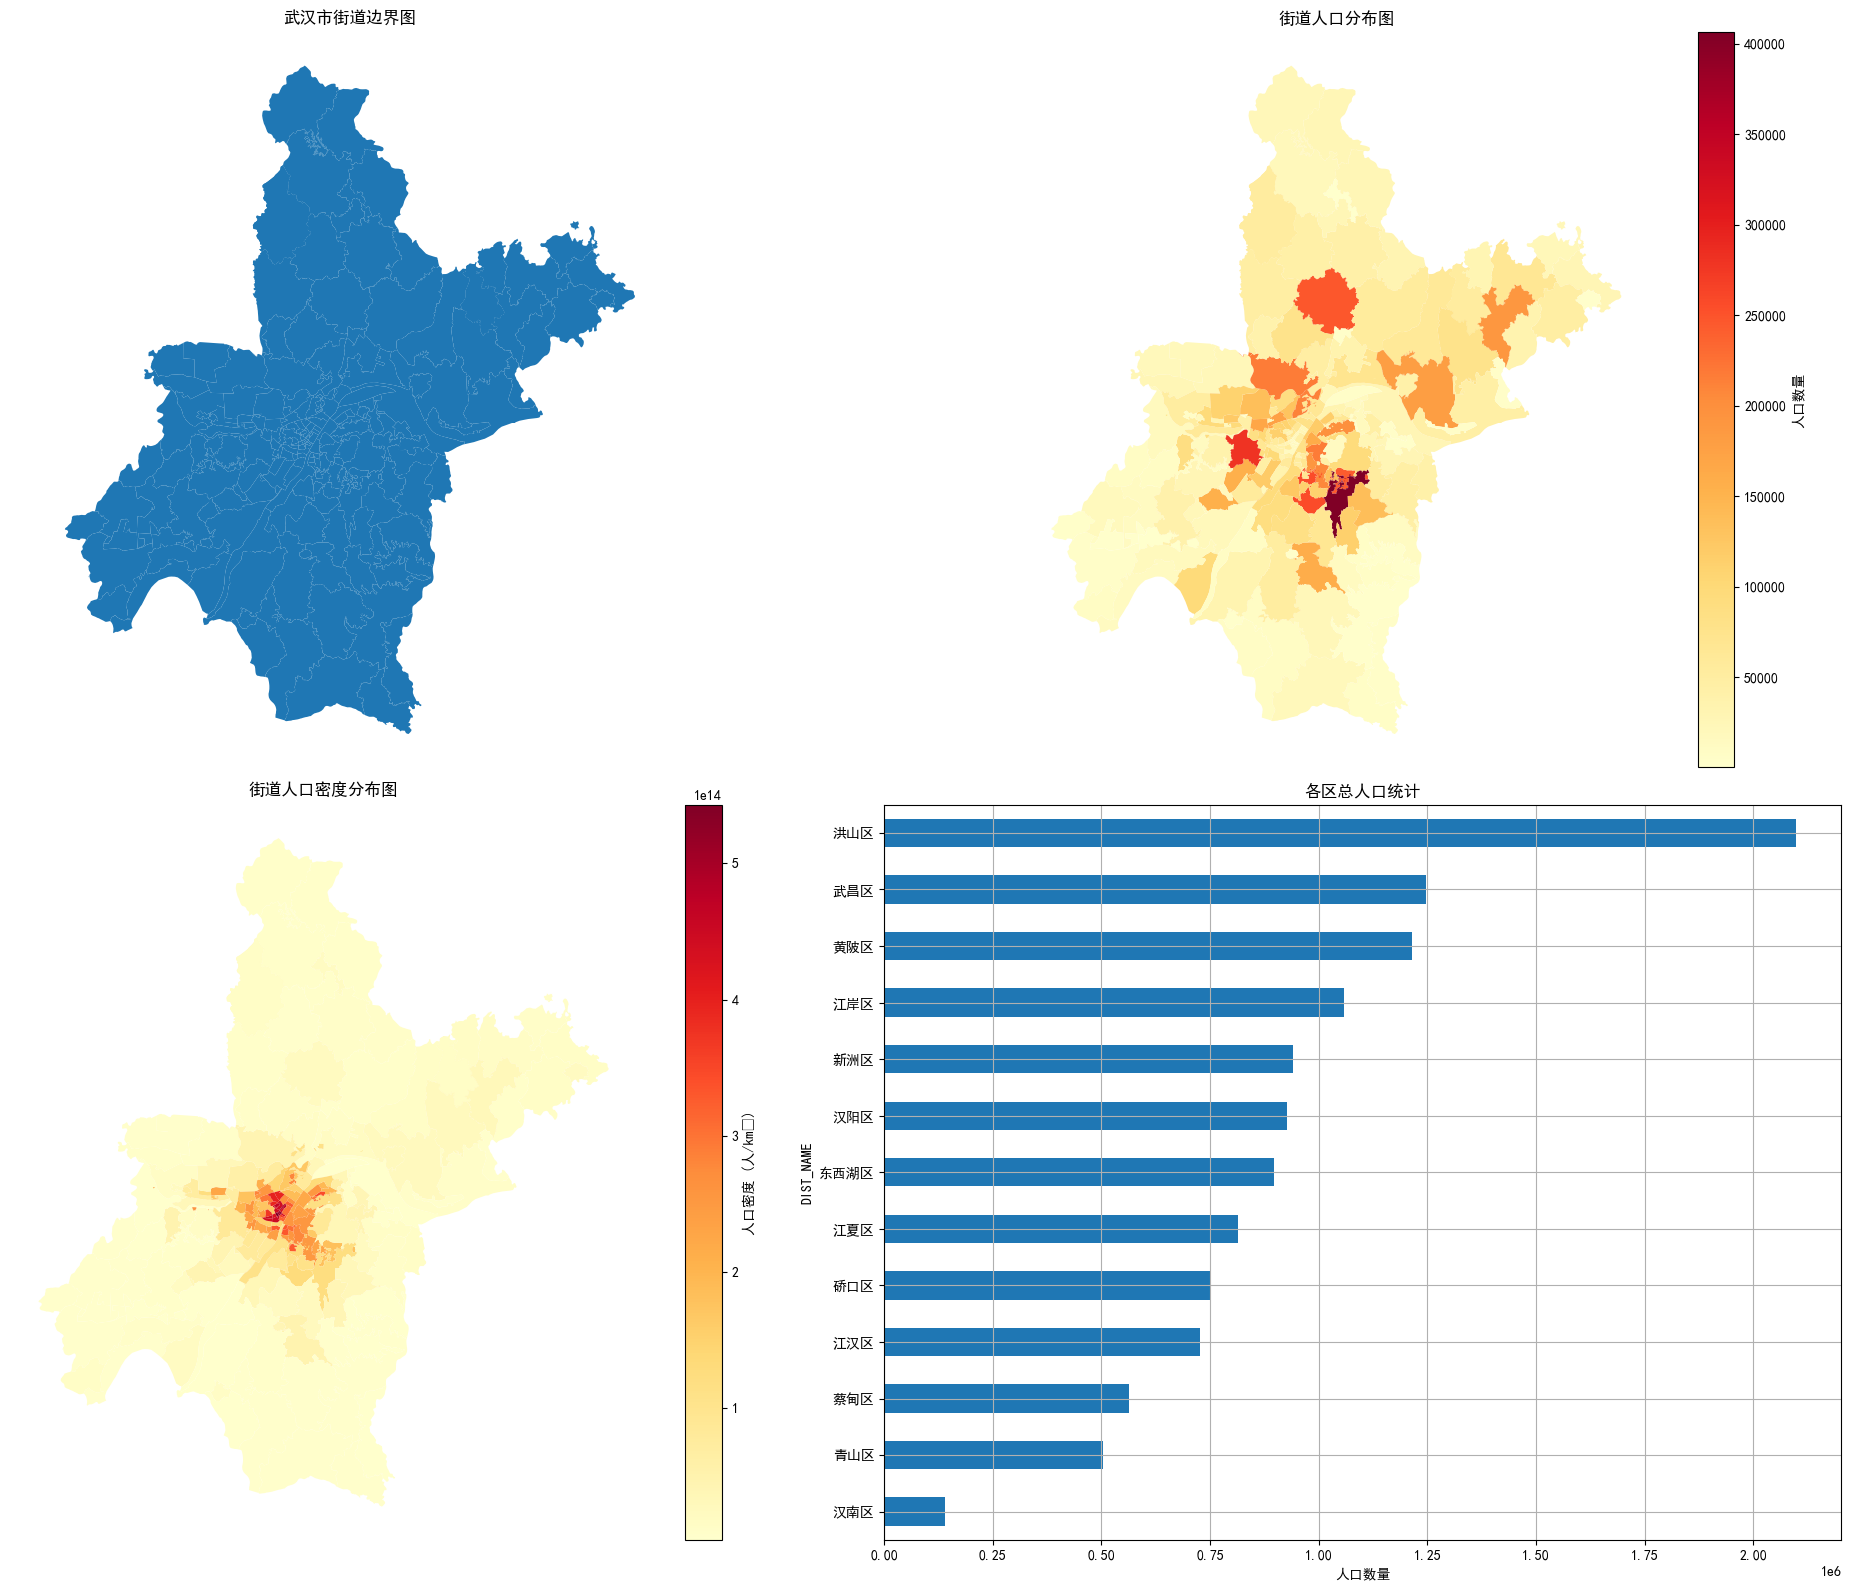


数据整理完成：
总街道数量：201
包含人口数据的街道数量：201

各区人口统计：
DIST_NAME
洪山区     2097224
武昌区     1246379
黄陂区     1213950
江岸区     1057934
新洲区      941776
汉阳区      926688
东西湖区     896401
江夏区      815260
硚口区      749936
江汉区      726691
蔡甸区      564534
青山区      504459
汉南区      139820
Name: POP, dtype: int64

数据文件已保存：F:\ScientificDatabase\paper02_use\wuhan_population_district.shp
字段说明文件已保存：F:\ScientificDatabase\paper02_use\字段说明.xlsx


In [17]:
# 将统计结果合并到原始地理数据中
district_gdf_with_pop = district_gdf.merge(
    street_stats[['Name', 'population', 'area_km2', '人口密度']], 
    on='Name', 
    how='left'
)

# 填充可能的空值
district_gdf_with_pop['population'] = district_gdf_with_pop['population'].fillna(0)
district_gdf_with_pop['area_km2'] = district_gdf_with_pop['area_km2'].fillna(0)
district_gdf_with_pop['人口密度'] = district_gdf_with_pop['人口密度'].fillna(0)

# 重命名列，确保符合 shp 文件规范
district_gdf_with_pop = district_gdf_with_pop.rename(columns={
    'population': 'POP',
    'area_km2': 'AREA_KM2',
    '人口密度': 'POP_DENS',
    'district': 'DIST_NAME'
})

# 输出地理数据文件
output_shp = r"F:\ScientificDatabase\paper02_use\wuhan_population_district.shp"
district_gdf_with_pop.to_file(output_shp, encoding='utf-8')

# 创建可视化展示
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. 街道边界图
district_gdf_with_pop.plot(ax=ax1)
ax1.set_title('武汉市街道边界图')
ax1.axis('off')

# 2. 人口分布图
district_gdf_with_pop.plot(
    column='POP',
    ax=ax2,
    legend=True,
    cmap='YlOrRd',
    legend_kwds={'label': '人口数量'}
)
ax2.set_title('街道人口分布图')
ax2.axis('off')

# 3. 人口密度分布图
district_gdf_with_pop.plot(
    column='POP_DENS',
    ax=ax3,
    legend=True,
    cmap='YlOrRd',
    legend_kwds={'label': '人口密度 (人/km²)'}
)
ax3.set_title('街道人口密度分布图')
ax3.axis('off')

# 4. 区域统计图
district_summary = district_gdf_with_pop.groupby('DIST_NAME')['POP'].sum().sort_values()
district_summary.plot(kind='barh', ax=ax4)
ax4.set_title('各区总人口统计')
ax4.set_xlabel('人口数量')
ax4.grid(True)

plt.tight_layout()
plt.show()

# 打印数据验证信息
print("\n数据整理完成：")
print(f"总街道数量：{len(district_gdf_with_pop)}")
print(f"包含人口数据的街道数量：{len(district_gdf_with_pop[district_gdf_with_pop['POP'] > 0])}")
print("\n各区人口统计：")
print(district_gdf_with_pop.groupby('DIST_NAME')['POP'].sum().sort_values(ascending=False))

# 保存字段说明文档
field_desc = pd.DataFrame({
    '字段名': ['POP', 'AREA_KM2', 'POP_DENS', 'DIST_NAME', 'Name'],
    '字段说明': ['人口数量', '面积(平方公里)', '人口密度(人/平方公里)', '所属区名称', '街道名称'],
    '数据类型': ['整数', '浮点数', '浮点数', '字符串', '字符串']
})

desc_path = r"F:\ScientificDatabase\paper02_use\字段说明.xlsx"
field_desc.to_excel(desc_path, index=False)

print(f"\n数据文件已保存：{output_shp}")
print(f"字段说明文件已保存：{desc_path}")

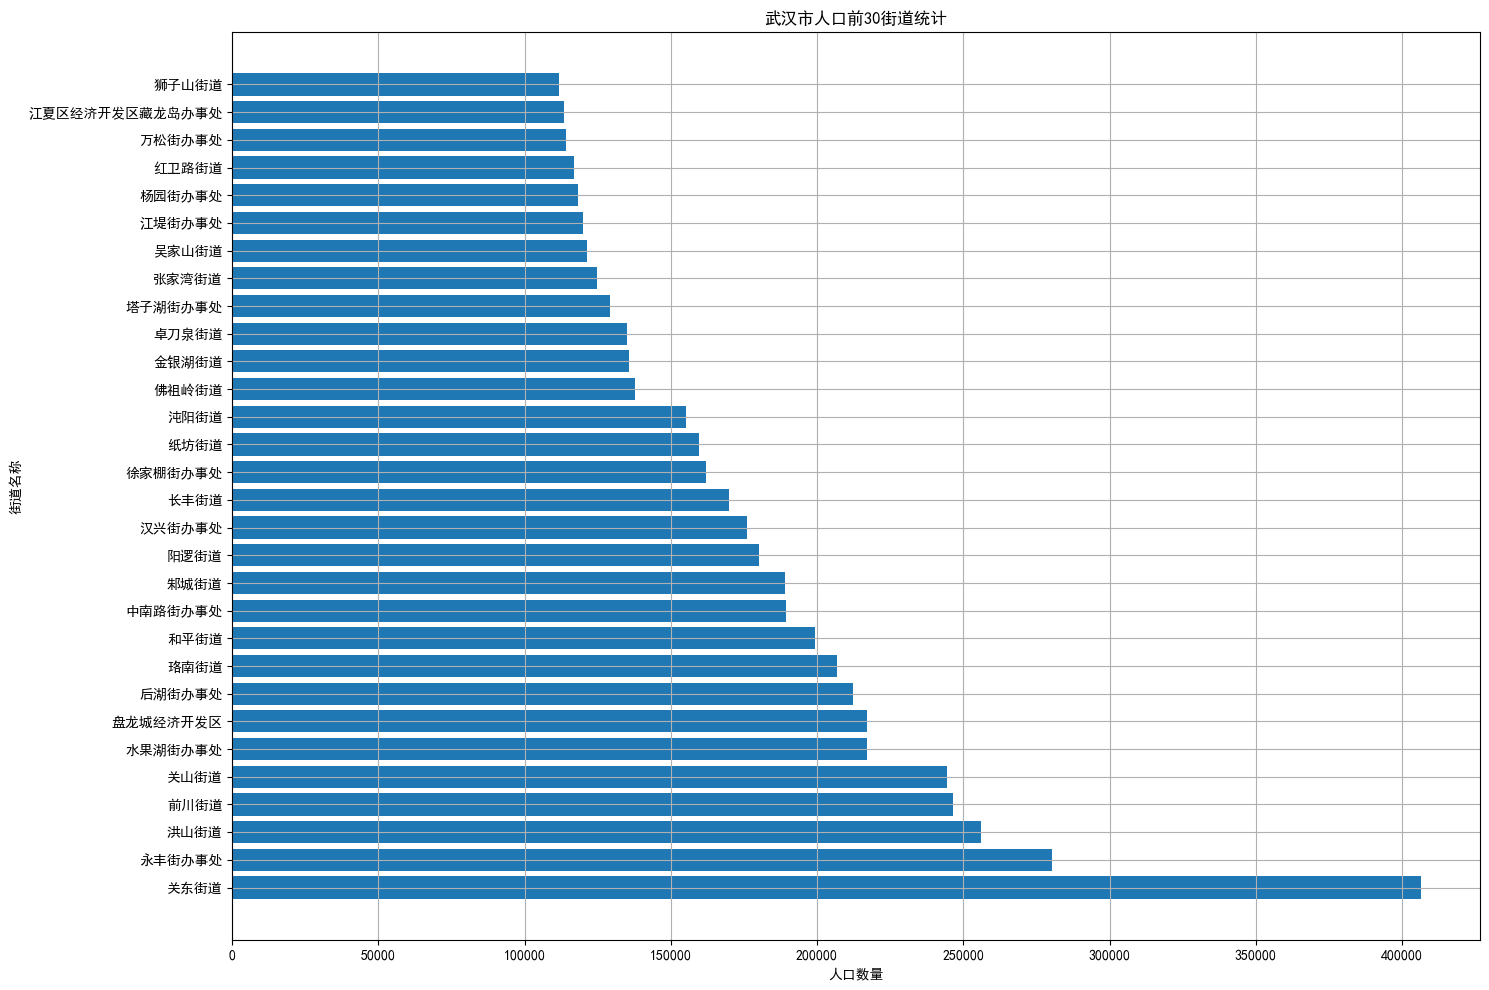


人口最多的前20个街道：
    街道名称 所属区域   人口数量      面积(km²)         人口密度
    关东街道  洪山区 406380 3.322306e-09 1.223186e+14
  永丰街办事处  汉阳区 280268 3.273673e-09 8.561270e+13
    洪山街道  洪山区 255938 1.985071e-09 1.289314e+14
    前川街道  黄陂区 246433 1.015461e-08 2.426809e+13
    关山街道  洪山区 244262 1.345612e-09 1.815248e+14
 水果湖街办事处  武昌区 217105 8.469579e-10 2.563351e+14
盘龙城经济开发区  黄陂区 216938 4.787549e-09 4.531296e+13
  后湖街办事处  江岸区 212252 1.262571e-09 1.681109e+14
    珞南街道  洪山区 206900 8.218640e-10 2.517448e+14
    和平街道  洪山区 199393 1.693434e-09 1.177448e+14
 中南路街办事处  武昌区 189219 6.784793e-10 2.788869e+14
    邾城街道  新洲区 188952 5.838356e-09 3.236391e+13
    阳逻街道  新洲区 180302 7.001711e-09 2.575113e+13
  汉兴街办事处  江汉区 176002 6.815601e-10 2.582340e+14
    长丰街道  硚口区 169849 9.582973e-10 1.772404e+14
 徐家棚街办事处  武昌区 161876 6.871008e-10 2.355928e+14
    纸坊街道  江夏区 159605 3.316599e-09 4.812309e+13
    沌阳街道  蔡甸区 155156 3.502338e-09 4.430070e+13
   佛祖岭街道  江夏区 137810 4.155557e-09 3.316282e+13
   金银湖街道 东西湖区 135848 2.294096e-09 5.921635e+13

In [18]:
# 创建街道级别的详细统计
street_details = district_gdf_with_pop.sort_values('POP', ascending=False)[
    ['Name', 'DIST_NAME', 'POP', 'AREA_KM2', 'POP_DENS']
].copy()

# 重命名列以便更好显示
street_details.columns = ['街道名称', '所属区域', '人口数量', '面积(km²)', '人口密度']

# 创建可视化
plt.figure(figsize=(15, 10))
plt.barh(street_details['街道名称'][:30], street_details['人口数量'][:30])
plt.title('武汉市人口前30街道统计')
plt.xlabel('人口数量')
plt.ylabel('街道名称')
plt.grid(True)
plt.tight_layout()
plt.show()

# 打印统计信息
print("\n人口最多的前20个街道：")
print("=" * 80)
print(street_details.head(20).to_string(index=False))

# 按区域分组显示街道统计
for district in street_details['所属区域'].unique():
    print(f"\n{district}街道人口统计：")
    print("=" * 80)
    district_data = street_details[street_details['所属区域'] == district].sort_values('人口数量', ascending=False)
    print(district_data.to_string(index=False))

# 保存详细统计到Excel
output_details = r"F:\ScientificDatabase\paper02_use\wuhan_street_population_details.xlsx"
with pd.ExcelWriter(output_details) as writer:
    # 总体统计表
    street_details.to_excel(writer, sheet_name='总体街道统计', index=False)
    
    # 分区统计表
    for district in street_details['所属区域'].unique():
        district_data = street_details[street_details['所属区域'] == district].sort_values('人口数量', ascending=False)
        district_data.to_excel(writer, sheet_name=f'{district}统计', index=False)
    
    # 街道排名表
    street_details.sort_values('人口数量', ascending=False).head(50).to_excel(
        writer, sheet_name='人口Top50街道', index=False
    )

print(f"\n详细统计结果已保存至：{output_details}")

# 计算一些关键统计指标
print("\n关键统计指标：")
print("=" * 80)
print(f"街道平均人口：{street_details['人口数量'].mean():,.0f}")
print(f"街道人口中位数：{street_details['人口数量'].median():,.0f}")
print(f"最高人口街道：{street_details.iloc[0]['街道名称']} ({street_details.iloc[0]['人口数量']:,.0f}人)")
print(f"最低人口街道：{street_details.iloc[-1]['街道名称']} ({street_details.iloc[-1]['人口数量']:,.0f}人)")